In [1]:
import warnings
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Load the dataset, first and then clean it

In [2]:
df_0_clean = pd.read_csv('/kaggle/input/d/alvinrindra/consumer-complaints/Consumer_Complaints.csv')
df_0_clean.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,03/12/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,03/17/2014,Closed with explanation,Yes,No,759217
1,10/01/2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,10/05/2016,Closed with explanation,Yes,No,2141773
2,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,Older American,Consent provided,Web,10/20/2016,Closed with explanation,Yes,No,2163100
3,06/08/2014,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,06/10/2014,Closed with explanation,Yes,Yes,885638
4,09/13/2014,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,09/13/2014,Closed with explanation,Yes,Yes,1027760


**Check Null value**

In [3]:
print(df_0_clean.isnull().sum())
print(df_0_clean.info())

Date received                        0
Product                              0
Sub-product                     235170
Issue                                0
Sub-issue                       488682
Consumer complaint narrative    722317
Company public response         680977
Company                              0
State                            10892
ZIP code                         15051
Tags                            837232
Consumer consent provided?      526381
Submitted via                        0
Date sent to company                 0
Company response to consumer         1
Timely response?                     0
Consumer disputed?              203579
Complaint ID                         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972147 entries, 0 to 972146
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 972147 non-null  obje

The given result shows the count of missing values (zeros) for each column in a dataset. Here are the columns and the number of missing values in each:

- Date received: 0 missing values
- Product: 0 missing values
- Sub-product: 235,170 missing values
- Issue: 0 missing values
- Sub-issue: 488,682 missing values
- Consumer complaint narrative: 722,317 missing values
- Company public response: 680,977 missing values
- Company: 0 missing values
- State: 10,892 missing values
- ZIP code: 15,051 missing values
- Tags: 837,232 missing values
- Consumer consent provided?: 526,381 missing values
- Submitted via: 0 missing values
- Date sent to company: 0 missing values
- Company response to consumer: 1 missing value
- Timely response?: 0 missing values
- Consumer disputed?: 203,579 missing values
- Complaint ID: 0 missing values

# Build a Wrangle Function For Cleaning Data

In [4]:
def wrangle(filepath):
    #Read CSV file into DataFrame
    df = pd.read_csv(filepath)
    
    #drope nan cells
    df.dropna(inplace = True)
    
    
    return df


In [5]:
df = wrangle('/kaggle/input/d/alvinrindra/consumer-complaints/Consumer_Complaints.csv')

In [6]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
297,03/01/2016,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt resulted from identity theft,I was called on my cell phone by First Nationa...,Company believes it acted appropriately as aut...,"First National Collection Bureau, Inc.",CA,921XX,Servicemember,Consent provided,Web,03/01/2016,Closed with explanation,Yes,No,1809977
313,08/13/2015,Debt collection,Medical,Communication tactics,Called after sent written cease of comm,I sent a cease and desist letter to a medical ...,Company believes complaint caused principally ...,"JP RECOVERY SERVICES, INC.",OH,440XX,Servicemember,Consent provided,Web,08/25/2015,Closed,Yes,Yes,1518155
1455,03/23/2017,Debt collection,Medical,Cont'd attempts collect debt not owed,Debt was paid,"Phoenix Financial Services, LLC continues to r...",Company believes it acted appropriately as aut...,Phoenix Financial Services LLC,CO,802XX,Servicemember,Consent provided,Web,03/23/2017,Closed with explanation,Yes,No,2400971
1641,06/02/2016,Debt collection,Medical,Disclosure verification of debt,Right to dispute notice not received,ai broke some ribs while on a fishing trip to ...,Company believes it acted appropriately as aut...,"Credit Bureau Systems, Inc.",IL,629XX,Older American,Consent provided,Web,06/02/2016,Closed with explanation,Yes,No,1951609
2294,08/10/2015,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt was paid,Hi my name XXXX XXXX XXXX this company reporte...,Company believes it acted appropriately as aut...,ERC,CA,945XX,Servicemember,Consent provided,Web,08/10/2015,Closed with non-monetary relief,Yes,No,1511183


In [7]:
print(df.isnull().sum())

Date received                   0
Product                         0
Sub-product                     0
Issue                           0
Sub-issue                       0
Consumer complaint narrative    0
Company public response         0
Company                         0
State                           0
ZIP code                        0
Tags                            0
Consumer consent provided?      0
Submitted via                   0
Date sent to company            0
Company response to consumer    0
Timely response?                0
Consumer disputed?              0
Complaint ID                    0
dtype: int64


All Missing values has been droped

# Exploring data

In [8]:
columns = df.columns
columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

# Use value_count method, to plot each column

In [9]:
product_counts = df['Product'].value_counts()
sub_product_counts = df['Sub-product'].value_counts()
issue_counts = df['Issue'].value_counts()
sub_issue_counts = df['Sub-issue'].value_counts()
company_response_to_consumer = df['Company response to consumer'].value_counts()
timely_response = df['Timely response?'].value_counts()
companies = df['Company'].value_counts()
State_counts = df['State'].value_counts()
Date_sent_to_company = df['Date sent to company'].value_counts()
Date_received = df['Date received'].value_counts()

## plotting product_counts

In [10]:
product_counts

Debt collection    2969
Student loan        136
Name: Product, dtype: int64

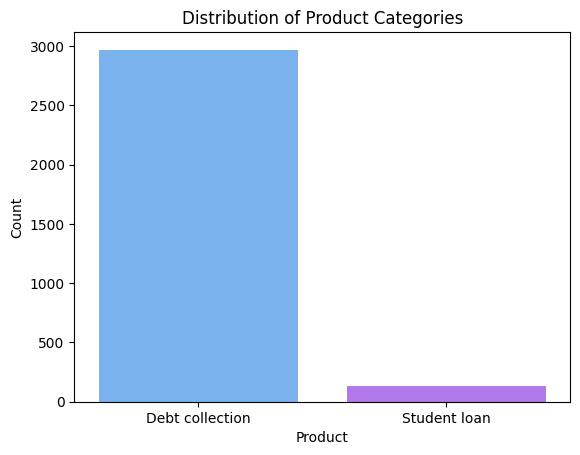

In [11]:
# Define a custom color palette
colors = sns.color_palette('cool', len(product_counts))

# Plot the vertical bar chart with ascending order and custom colors
sns.barplot(x=product_counts.index, y=product_counts.values, palette=colors, alpha=0.9)

# Set the labels and title
plt.xlabel('Product')
plt.ylabel('Count')
plt.title('Distribution of Product Categories')
plt.savefig("Distribution of Product Categories.png")
# Display the plot
plt.show()



The given result represents the observation of a specific column named "Product" in a dataframe. Here is the observation:

- "Debt collection" has a count of 2,969 occurrences.
- "Student loan" has a count of 136 occurrences.

The result indicates that the "Product" column contains two distinct categories: "Debt collection" and "Student loan". "Debt collection" appears 2,969 times in the dataset, while "Student loan" appears 136 times.

## Plotting sub_product

In [12]:
sub_product_counts

Other (i.e. phone, health club, etc.)    1075
I do not know                             556
Medical                                   538
Credit card                               483
Non-federal student loan                  127
Mortgage                                   92
Auto                                       76
Payday loan                                72
Federal student loan servicing             53
Federal student loan                       33
Name: Sub-product, dtype: int64

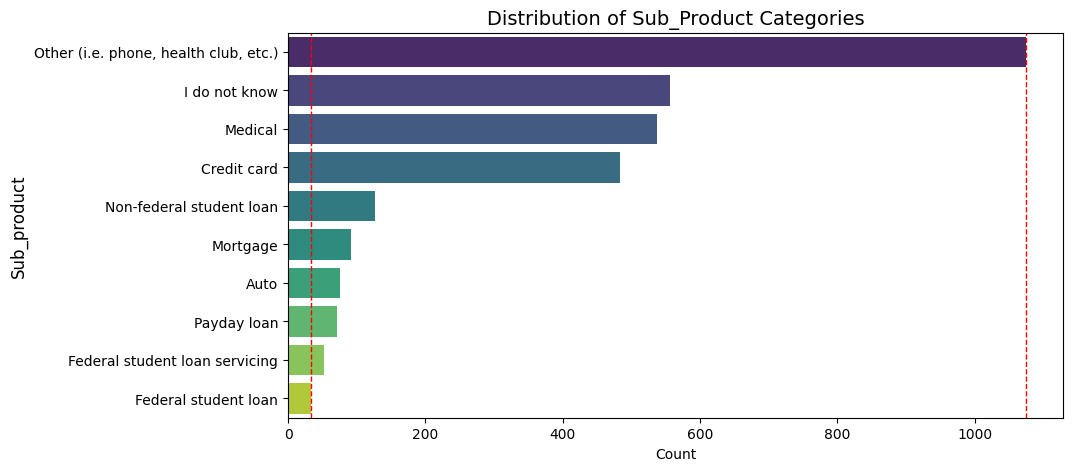

Min_value: 33
Max_value: 1075


In [13]:
# Set the figure size
plt.figure(figsize=(10, 5))

# Define a custom color palette
colors = sns.color_palette('viridis', len(sub_product_counts))

# Plot the horizontal bar chart with ascending order and custom colors
sns.barplot(x=sub_product_counts, y=sub_product_counts.index, palette=colors)

# Set the labels and title
plt.xlabel('Count', fontsize=10)
plt.ylabel('Sub_product', fontsize=12)
plt.title('Distribution of Sub_Product Categories', fontsize=14)

# Add lines for the minimum and maximum values
min_value = sub_product_counts.min()
max_value = sub_product_counts.max()
plt.axvline(x=min_value, color='red', linestyle='--', linewidth=1)
plt.axvline(x=max_value, color='red', linestyle='--', linewidth=1)

plt.savefig("Distribution of SubProduct Categories.png")
# Display the plot
plt.show()
print('Min_value:', min_value)
print('Max_value:', max_value)

## Observation:

Here is the observation:

- "Other (i.e. phone, health club, etc.)" has a count of 1,075 occurrences.
- "I do not know" has a count of 556 occurrences.
- "Medical" has a count of 538 occurrences.
- "Credit card" has a count of 483 occurrences.
- "Non-federal student loan" has a count of 127 occurrences.
- "Mortgage" has a count of 92 occurrences.
- "Auto" has a count of 76 occurrences.
- "Payday loan" has a count of 72 occurrences.
- "Federal student loan servicing" has a count of 53 occurrences.
- "Federal student loan" has a count of 33 occurrences.

The result provides insights into the distribution of sub-products within the "Sub-product" column. Each sub-product category is listed with its corresponding count, indicating the frequency of occurrence in the dataset.

## Plotting Issue_count

In [14]:
issue_counts

Cont'd attempts collect debt not owed    1463
Disclosure verification of debt           449
Communication tactics                     391
False statements or representation        288
Taking/threatening an illegal action      216
Improper contact or sharing of info       162
Dealing with my lender or servicer         99
Can't repay my loan                        31
Getting a loan                              6
Name: Issue, dtype: int64

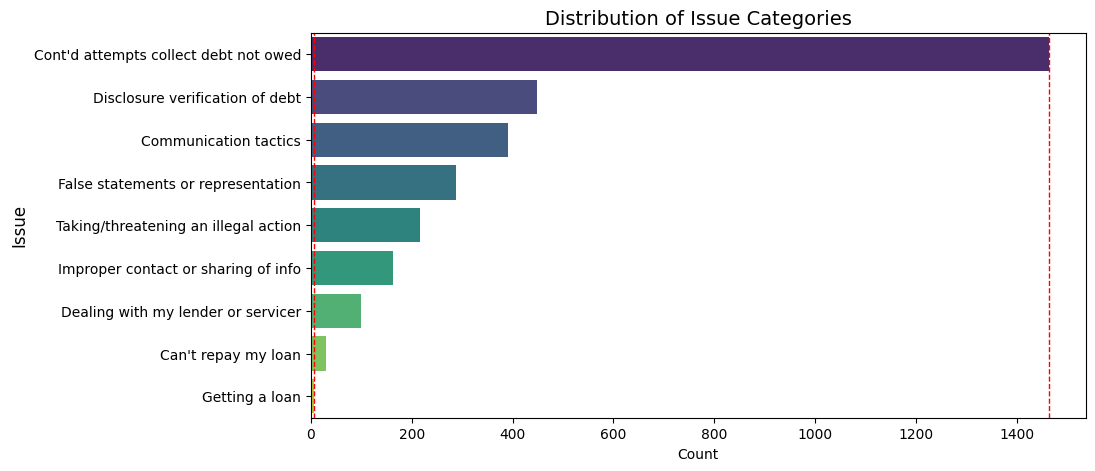

Min_value: 6
Max_value: 1463


In [15]:
# Set the figure size
plt.figure(figsize=(10, 5))

# Define a custom color palette
colors = sns.color_palette('viridis', len(issue_counts))

# Plot the horizontal bar chart with ascending order and custom colors
sns.barplot(x=issue_counts, y=issue_counts.index, palette=colors)

# Set the labels and title
plt.xlabel('Count', fontsize=10)
plt.ylabel('Issue', fontsize=12)
plt.title('Distribution of Issue Categories', fontsize=14)

# Add lines for the minimum and maximum values
min_value = issue_counts.min()
max_value = issue_counts.max()
plt.axvline(x=min_value, color='red', linestyle='--', linewidth=1)
plt.axvline(x=max_value, color='red', linestyle='--', linewidth=1)
plt.savefig("Distribution of Issue Categories.png")

# Display the plot
plt.show()
print('Min_value:', min_value)
print('Max_value:', max_value)

# Observation

- "Cont'd attempts collect debt not owed" has a count of 1,463 occurrences, which is the max.
- "Disclosure verification of debt" has a count of 449 occurrences.
- "Communication tactics" has a count of 391 occurrences.
- "False statements or representation" has a count of 288 occurrences.
- "Taking/threatening an illegal action" has a count of 216 occurrences.
- "Improper contact or sharing of info" has a count of 162 occurrences.
- "Dealing with my lender or servicer" has a count of 99 occurrences.
- "Can't repay my loan" has a count of 31 occurrences.
- "Getting a loan" has a count of 6 occurrences, which is the min.

The result indicates the frequency of different issues reported within the "Issue" column of the dataset. Each issue category is listed with its respective count, representing the number of times it appears in the dataset.

In [16]:
sub_issue_counts

Debt is not mine                           883
Debt was paid                              409
Frequent or repeated calls                 231
Not given enough info to verify debt       228
Attempted to collect wrong amount          217
Right to dispute notice not received       182
Debt resulted from identity theft          128
Talked to a third party about my debt       97
Threatened to take legal action             76
Threatened to sue on too old debt           59
Threatened arrest/jail if do not pay        50
Seized/Attempted to seize property          49
Debt was discharged in bankruptcy           43
Used obscene/profane/abusive language       41
Contacted me after I asked not to           41
Not disclosed as an attempt to collect      39
Indicated committed crime not paying        34
Called after sent written cease of comm     30
Impersonated an attorney or official        27
Received bad information about my loan      26
Sued w/o proper notification of suit        25
Trouble with 

In [17]:
#take the first 10 values
sub_issue_count_10 = sub_issue_counts.head(10)
sub_issue_count_10

Debt is not mine                         883
Debt was paid                            409
Frequent or repeated calls               231
Not given enough info to verify debt     228
Attempted to collect wrong amount        217
Right to dispute notice not received     182
Debt resulted from identity theft        128
Talked to a third party about my debt     97
Threatened to take legal action           76
Threatened to sue on too old debt         59
Name: Sub-issue, dtype: int64

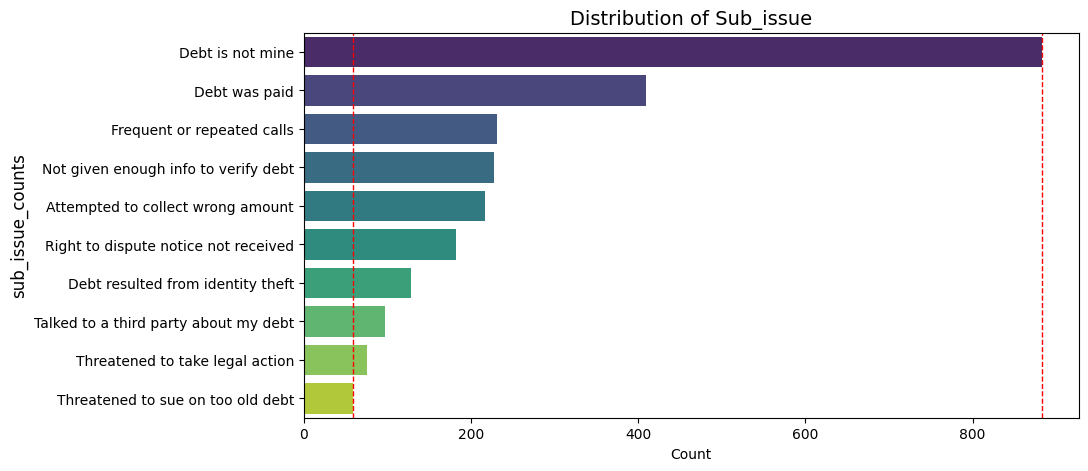

Min_value: 59
Max_value: 883


In [18]:
# Set the figure size
plt.figure(figsize=(10, 5))

# Define a custom color palette
colors = sns.color_palette('viridis', len(sub_issue_count_10))

# Plot the horizontal bar chart with ascending order and custom colors
sns.barplot(x=sub_issue_count_10, y=sub_issue_count_10.index, palette=colors)

# Set the labels and title
plt.xlabel('Count', fontsize=10)
plt.ylabel('sub_issue_counts', fontsize=12)
plt.title('Distribution of Sub_issue', fontsize=14)

# Add lines for the minimum and maximum values
min_value = sub_issue_count_10.min()
max_value = sub_issue_count_10.max()
plt.axvline(x=min_value, color='red', linestyle='--', linewidth=1)
plt.axvline(x=max_value, color='red', linestyle='--', linewidth=1)


# Display the plot
plt.show()
print('Min_value:', min_value)
print('Max_value:', max_value)

## Obervation 

- "Debt is not mine" has a count of 883 occurrences.
- "Debt was paid" has a count of 409 occurrences.
- "Frequent or repeated calls" has a count of 231 occurrences.
- "Not given enough info to verify debt" has a count of 228 occurrences.
- "Attempted to collect wrong amount" has a count of 217 occurrences.
- "Right to dispute notice not received" has a count of 182 occurrences.
- "Debt resulted from identity theft" has a count of 128 occurrences.
- "Talked to a third party about my debt" has a count of 97 occurrences.
- "Threatened to take legal action" has a count of 76 occurrences.
- "Threatened to sue on too old debt" has a count of 59 occurrences.
- "Threatened arrest/jail if do not pay" has a count of 50 occurrences.
- "Seized/Attempted to seize property" has a count of 49 occurrences.
- "Debt was discharged in bankruptcy" has a count of 43 occurrences.
- "Used obscene/profane/abusive language" has a count of 41 occurrences.
- "Contacted me after I asked not to" has a count of 41 occurrences.
- "Not disclosed as an attempt to collect" has a count of 39 occurrences.
- "Indicated committed crime not paying" has a count of 34 occurrences.
- "Called after sent written cease of comm" has a count of 30 occurrences.
- "Impersonated an attorney or official" has a count of 27 occurrences.
- "Received bad information about my loan" has a count of 26 occurrences.
- "Sued w/o proper notification of suit" has a count of 25 occurrences.
- "Trouble with how payments are handled" has a count of 24 occurrences.
- "Attempted to/Collected exempt funds" has a count of 20 occurrences.
- "Don't agree with fees charged" has a count of 19 occurrences.
- "Having problems with customer service" has a count of 18 occurrences.
- "Contacted employer after asked not to" has a count of 17 occurrences.
- "Can't decrease my monthly payments" has a count of 16 occurrences.
- "Called outside of 8am-9pm" has a count of 13 occurrences.
- "Sued where didn't live/sign for debt" has a count of 13 occurrences.
- "Indicated shouldn't respond to lawsuit" has a count of 10 occurrences.
- "Can't temporarily postpone payments" has a count of 9 occurrences.
- "Need information about my balance/terms" has a count of 7 occurrences.
- "Contacted me instead of my attorney" has a count of 7 occurrences.
- "Can't get flexible payment options" has a count of 6 occurrences.
- "Keep getting calls about my loan" has a count of 5 occurrences.
- "Can't qualify for a loan" has a count of 4 occurrences.
- "Qualify for a better loan than offered" has a count of 2 occurrences.

The result provides insights into the distribution of sub-issues within the "Sub-issue" column of the dataset. Each sub-issue category is listed with its corresponding count, indicating the frequency of occurrence in the dataset.

## Ploting company_response_to_consumer

In [19]:
company_response_to_consumer

Closed with explanation            2442
Closed with non-monetary relief     430
Closed                              182
Closed with monetary relief          51
Name: Company response to consumer, dtype: int64

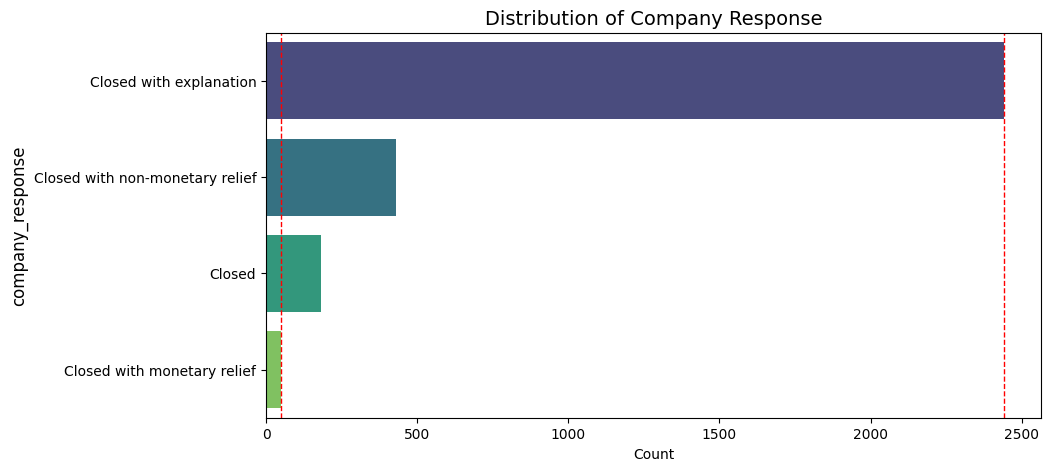

Min_value: 51
Max_value: 2442


In [20]:
# Set the figure size
plt.figure(figsize=(10, 5))

# Define a custom color palette
colors = sns.color_palette('viridis', len(company_response_to_consumer))

# Plot the horizontal bar chart with ascending order and custom colors
sns.barplot(x=company_response_to_consumer, y=company_response_to_consumer.index, palette=colors)

# Set the labels and title
plt.xlabel('Count', fontsize=10)
plt.ylabel('company_response', fontsize=12)
plt.title('Distribution of Company Response', fontsize=14)

# Add lines for the minimum and maximum values
min_value = company_response_to_consumer.min()
max_value = company_response_to_consumer.max()
plt.axvline(x=min_value, color='red', linestyle='--', linewidth=1)
plt.axvline(x=max_value, color='red', linestyle='--', linewidth=1)


# Display the plot
plt.show()
print('Min_value:', min_value)
print('Max_value:', max_value)

## Observation:

- "Closed with explanation" has a count of 2,442 occurrences.
- "Closed with non-monetary relief" has a count of 430 occurrences.
- "Closed" has a count of 182 occurrences.
- "Closed with monetary relief" has a count of 51 occurrences.

The result provides information about the distribution of different types of responses from companies to consumers within the "Company response to consumer" column. Each response category is listed with its respective count, indicating the frequency of occurrence in the dataset.

## Plottting timely_response

In [21]:
timely_response

Yes    2966
No      139
Name: Timely response?, dtype: int64

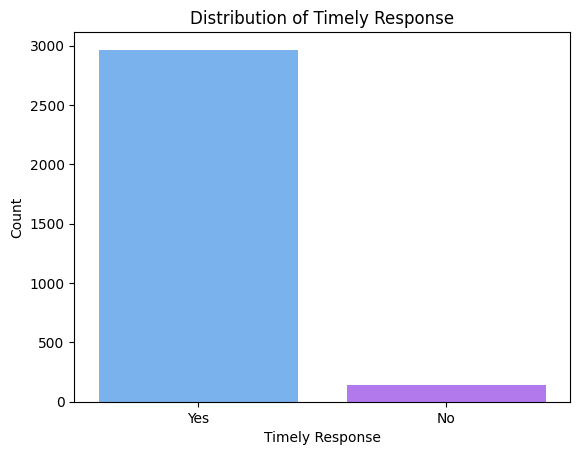

In [22]:
# Define a custom color palette
colors = sns.color_palette('cool', len(timely_response))

# Plot the vertical bar chart with ascending order and custom colors
sns.barplot(x=timely_response.index, y=timely_response.values, palette=colors, alpha=0.9)

# Set the labels and title
plt.xlabel('Timely Response')
plt.ylabel('Count')
plt.title('Distribution of Timely Response')
plt.savefig("Distribution of  Timely Response.png")
# Display the plot
plt.show()

# Obervation:
- "Yes" has a count of 2,966 occurrences.
- "No" has a count of 139 occurrences.

The result indicates the frequency of different responses within the "Timely response?" column. Each response category is listed with its respective count, representing the number of times it appears in the dataset.

## plotting companies

In [23]:
companies

ERC                                             176
CITIBANK, N.A.                                   88
BANK OF AMERICA, NATIONAL ASSOCIATION            74
WELLS FARGO & COMPANY                            71
National Credit Systems,Inc.                     55
                                               ... 
BANK OF THE WEST                                  1
Metro Area Collection Service, Inc.               1
Knight Adjustment Bureau                          1
Credit Bureau of Traverse City, Inc.(Closed)      1
Tri-State Adjustments, Inc.                       1
Name: Company, Length: 626, dtype: int64

In [24]:
#taking the first 10 companies
companies_20 = companies.head(20)
companies_20

ERC                                        176
CITIBANK, N.A.                              88
BANK OF AMERICA, NATIONAL ASSOCIATION       74
WELLS FARGO & COMPANY                       71
National Credit Systems,Inc.                55
SYNCHRONY FINANCIAL                         51
I.C. System, Inc.                           47
Stellar Recovery, Inc.                      47
CCS Financial Services, Inc.                44
Focus Holding Company                       41
Hunter Warfield, Inc.                       40
Receivables Performance Management, LLC     40
The CMI Group, Inc.                         35
Credit Protection Association, L.P.         34
Penn Credit Corporation                     34
First National Collection Bureau, Inc.      33
I.Q. DATA INTERNATIONAL, INC.               30
Allied Interstate LLC                       30
ProCollect, Inc                             28
CMRE Financial Services, Inc.               28
Name: Company, dtype: int64

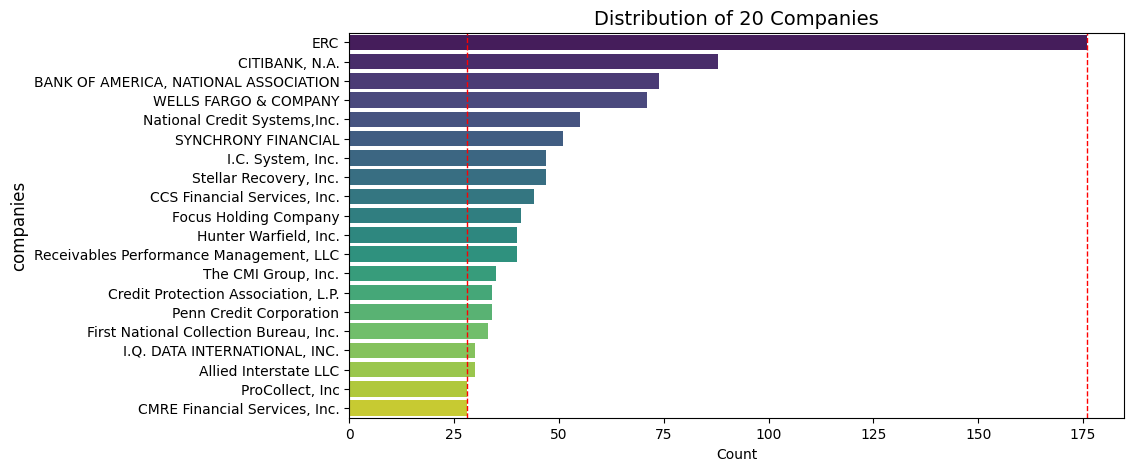

Min_value: 28
Max_value: 176


In [25]:
# Set the figure size
plt.figure(figsize=(10, 5))

# Define a custom color palette
colors = sns.color_palette('viridis', len(companies_20))

# Plot the horizontal bar chart with ascending order and custom colors
sns.barplot(x=companies_20, y=companies_20.index, palette=colors)

# Set the labels and title
plt.xlabel('Count', fontsize=10)
plt.ylabel('companies', fontsize=12)
plt.title('Distribution of 20 Companies', fontsize=14)

# Add lines for the minimum and maximum values
min_value = companies_20.min()
max_value = companies_20.max()
plt.axvline(x=min_value, color='red', linestyle='--', linewidth=1)
plt.axvline(x=max_value, color='red', linestyle='--', linewidth=1)


# Display the plot
plt.show()
print('Min_value:', min_value)
print('Max_value:', max_value)

| Rank | Company_name                                   | Frequency |
|------|-------------------------------------------|-------|
| 1    | ERC                                       |  176  |
| 2    | CITIBANK, N.A.                            |   88  |
| 3    | BANK OF AMERICA, NATIONAL ASSOCIATION     |   74  |
| 4    | WELLS FARGO & COMPANY                     |   71  |
| 5    | National Credit Systems, Inc.             |   55  |
| 6    | SYNCHRONY FINANCIAL                       |   51  |
| 7    | I.C. System, Inc.                         |   47  |
| 7    | Stellar Recovery, Inc.                    |   47  |
| 9    | CCS Financial Services, Inc.              |   44  |
| 10   | Focus Holding Company                     |   41  |
| 11   | Hunter Warfield, Inc.                     |   40  |
| 11   | Receivables Performance Management, LLC   |   40  |
| 13   | The CMI Group, Inc.                       |   35  |
| 14   | Credit Protection Association, L.P.       |   34  |
| 14   | Penn Credit Corporation                   |   34  |
| 16   | First National Collection Bureau, Inc.    |   33  |
| 17   | I.Q. DATA INTERNATIONAL, INC.             |   30  |
| 17   | Allied Interstate LLC                     |   30  |
| 19   | ProCollect, Inc                           |   28  |
| 19   | CMRE Financial Services, Inc.             |   28  |


The table includes the rank of each company in addition to the company name and its corresponding count. The companies are listed in descending order based on their count, allowing for easy comparison and identification of the most frequent companies in the dataset.

## Plotting State_counts:

In [26]:
State_counts_30 = State_counts.head(30)
State_counts_30

CA    395
TX    309
FL    280
GA    180
VA    137
NY    109
NC    107
MD    106
OH     97
AZ     91
WA     91
IL     89
NJ     77
PA     77
TN     73
SC     65
CO     60
MI     53
MN     43
IN     42
NV     41
MO     40
OR     36
AL     35
KY     35
LA     35
UT     33
MA     33
WI     28
OK     27
Name: State, dtype: int64

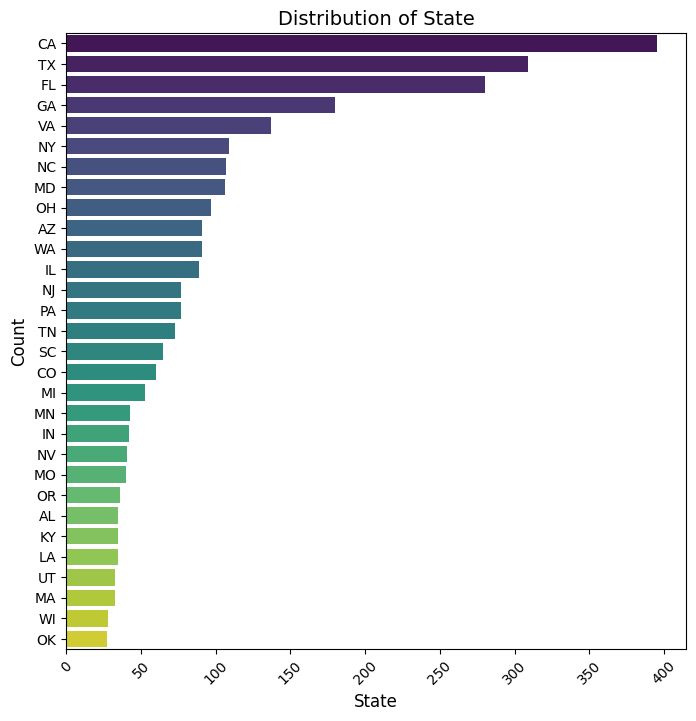

Min_value: 27
Max_value: 395


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(8, 8))

# Define a custom color palette
colors = sns.color_palette('viridis', len(State_counts_30))

# Plot the vertical bar chart with descending order and custom colors
sns.barplot(x=State_counts_30, y=State_counts_30.index, palette=colors)

# Set the labels and title
plt.xlabel('State', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of State', fontsize=14)

# Add lines for the minimum and maximum values
min_value = State_counts_30.min()
max_value = State_counts_30.max()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

print('Min_value:', min_value)
print('Max_value:', max_value)


## Also you use ISO2 to convert state names to full names

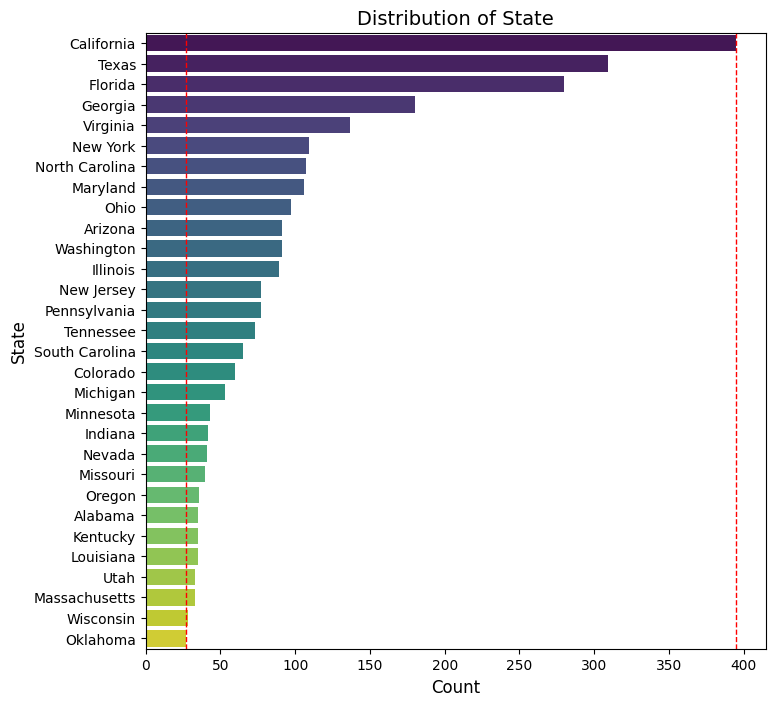

Min_value: 27
Max_value: 395


In [28]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
    
# invert the dictionary
abbrev_to_us_state = dict(map(reversed, us_state_to_abbrev.items()))

# Convert the ISO 2 codes to full state names
full_state_names = [abbrev_to_us_state[code] for code in State_counts_30.index]

# Set the figure size
plt.figure(figsize=(8, 8))

# Define a custom color palette
colors = sns.color_palette('viridis', len(State_counts_30))

# Plot the vertical bar chart with descending order and custom colors
sns.barplot(x=State_counts_30, y=full_state_names, palette=colors)

# Set the labels and title
plt.xlabel('Count', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.title('Distribution of State', fontsize=14)

# Add lines for the minimum and maximum values
min_value = State_counts_30.min()
max_value = State_counts_30.max()
plt.axvline(x=min_value, color='red', linestyle='--', linewidth=1)
plt.axvline(x=max_value, color='red', linestyle='--', linewidth=1)

# Display the plot
plt.show()

print('Min_value:', min_value)
print('Max_value:', max_value)

# Observation 
Here are the top 5 states with the highest number of consumer complaints:

1. California (CA) - 395 complaints
2. Texas (TX) - 309 complaints
3. Florida (FL) - 280 complaints
4. Georgia (GA) - 180 complaints
5. Virginia (VA) - 137 complaints

## Plotting Date_sent_to_company:

In [29]:
Date_sent_to_company

03/25/2015    15
09/13/2016    14
03/15/2016    13
02/14/2017    13
03/16/2017    13
              ..
01/24/2016     1
02/07/2016     1
02/21/2016     1
10/04/2015     1
03/07/2017     1
Name: Date sent to company, Length: 708, dtype: int64

/tmp/ipykernel_21/2085725753.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


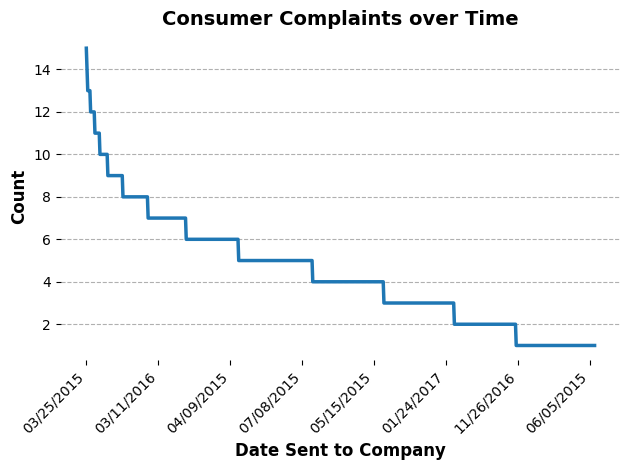

In [30]:
# Assuming you have a DataFrame named 'df' with the 'Date_sent_to_company' column
Date_sent_to_company.plot(linewidth=2.5)

# Set the labels and title with a clean and elegant font
plt.xlabel('Date Sent to Company', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.title('Consumer Complaints over Time', fontsize=14, fontweight='bold')

# Customize the tick labels and gridlines
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--')

# Adjust the plot layout for better spacing
plt.tight_layout()

# Display the plot with a smooth and elegant style
plt.style.use('seaborn-white')

# Show the plot with a subtle background and remove unnecessary borders
plt.box(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Save the plot as a high-resolution image for elegant presentations
plt.savefig('consumer_complaints over time.png', dpi=300)

# Finally, show the plot
plt.show()


## Observation
The most frequent date sent to the company is 03/25/2015, with a count of 15 instances. This indicates that on that particular date, the data was sent to the company the most number of times.

On the other hand, there are several dates with the least number of instances where the data was sent, each having a count of 1. Some of these dates include 01/24/2016, 02/07/2016, 02/21/2016, 10/04/2015, and 03/07/2017. These dates represent the instances where the data was sent to the company the least number of times.